# Titanic Survival Prediction

## Importing required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Data Pre-processing

In [3]:
ds = pd.read_csv("tested.csv")

In [4]:
ds.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S


In [5]:
ds.shape

(418, 12)

In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


### Data Cleaning

In [7]:
ds.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
ds.drop(columns='Cabin', axis=1, errors='ignore', inplace=True)

In [9]:
ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [10]:
ds['Age'].fillna(ds['Age'].mean(), inplace=True)
ds['Fare'].fillna(ds['Fare'].mean(), inplace=True)

In [11]:
ds.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Exploratory Data Analysis

In [12]:
ds.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.840500
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [13]:
ds['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

## Visualizations

In [14]:
sns.set

<function seaborn.rcmod.set(*args, **kwargs)>

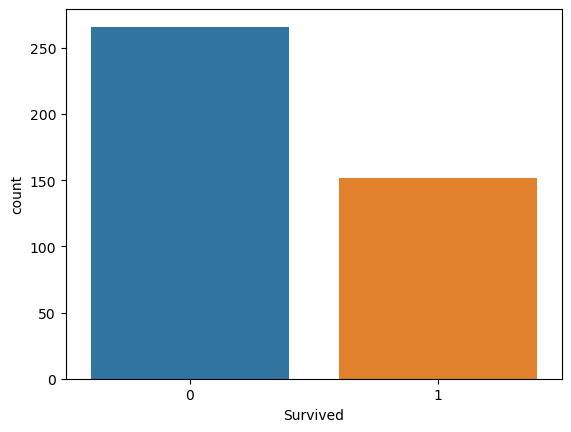

In [15]:
sns.countplot(x = 'Survived', data = ds)
plt.show()

In [16]:
ds['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

<Axes: xlabel='Pclass', ylabel='Age'>

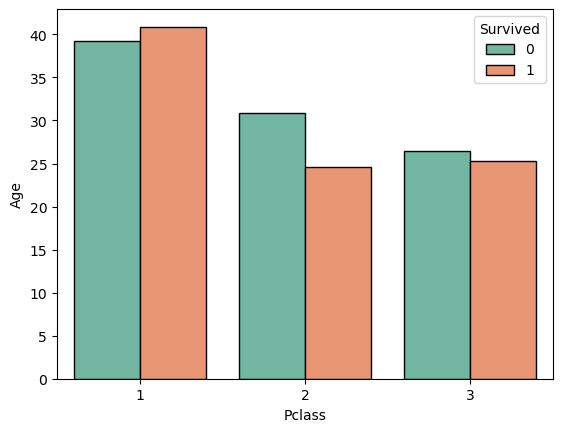

In [17]:
sns.barplot(y=ds['Age'], x=ds['Pclass'], data=ds, hue = ds.Survived, orient='v', palette='Set2', 
                 errorbar = None, edgecolor = "black")

#### By the above plot its clear that:
   - The Passenger class 1 travellers has a higher chance of survival followed by Pclass 2 and the passenger travelling in Pclass 3 has the least chance of survival.
   - Also in Pclass 1 the elderly passengers have a better probability of surviving.

<Axes: xlabel='Sex', ylabel='count'>

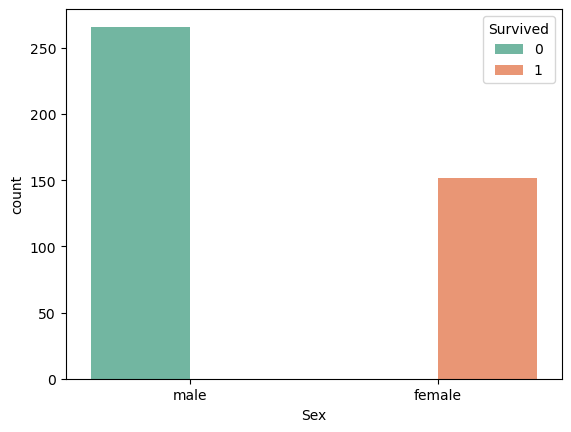

In [18]:
sns.countplot(x='Sex', hue='Survived', data=ds, palette='Set2')

<Axes: xlabel='Sex', ylabel='Survived'>

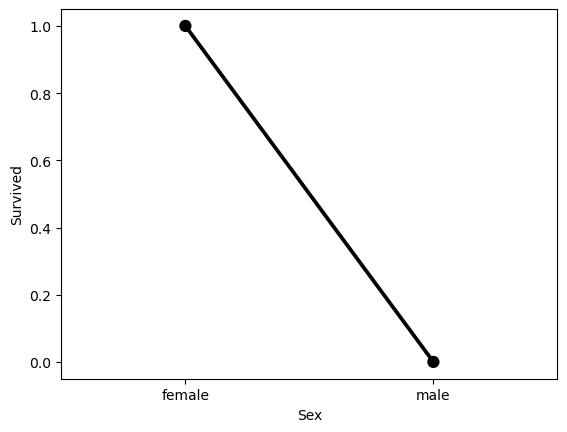

In [19]:
survival_rate = ds.groupby('Sex')['Survived'].mean().reset_index()

# Create a pointplot to display the survival rate based on sex
sns.pointplot(x='Sex', y='Survived', data=survival_rate, color='black')

#### Both the above plots inscribe that a female has better chance of survival than a male

## Predictive Modelling using Logistic Regression

In [20]:
ds.replace({'Sex':{'male':2,'female':3}, 'Embarked':{'S':4,'C':5,'Q':6}}, inplace = True)

In [21]:
ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",2,34.5,0,0,330911,7.8292,6
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",3,47.0,1,0,363272,7.0000,4
2,894,0,2,"Myles, Mr. Thomas Francis",2,62.0,0,0,240276,9.6875,6
3,895,0,3,"Wirz, Mr. Albert",2,27.0,0,0,315154,8.6625,4
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",3,22.0,1,1,3101298,12.2875,4


In [22]:
Parameters = ds.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Survived'], axis = 1)
Survival = ds['Survived']
Parameters

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,2,34.50000,0,0,7.8292,6
1,3,3,47.00000,1,0,7.0000,4
2,2,2,62.00000,0,0,9.6875,6
3,3,2,27.00000,0,0,8.6625,4
4,3,3,22.00000,1,1,12.2875,4
...,...,...,...,...,...,...,...
413,3,2,30.27259,0,0,8.0500,4
414,1,3,39.00000,0,0,108.9000,5
415,3,2,38.50000,0,0,7.2500,4
416,3,2,30.27259,0,0,8.0500,4


In [23]:
Survival

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [24]:
Parameters_train, Parameters_test, Survival_train, Survival_test = train_test_split(Parameters,Survival, test_size = 0.4, random_state = 2)

In [25]:
print(Parameters.shape, Parameters_test.shape, Parameters_train.shape)

(418, 7) (168, 7) (250, 7)


In [26]:
ds.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [27]:
testing = pd.get_dummies(Parameters, columns=['Sex'], drop_first=True)

mod = LogisticRegression(max_iter=1000, random_state = 0)

#Training model
mod.fit(Parameters_train, Survival_train)

LogisticRegression(max_iter=1000, random_state=0)

In [28]:
Parameters_train_prediction = mod.predict(Parameters_train)
print(Parameters_train_prediction)

[0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 1 1 0 1
 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1 1 0
 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 0
 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0
 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 1 1 0 0 0 1 1
 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1]


In [29]:
training_data_accuracy = accuracy_score(Survival_train, Parameters_train_prediction)
print('The accuracy of training data is = ', training_data_accuracy)

The accuracy of training data is =  1.0


In [30]:
Parameters_test_prediction = mod.predict(Parameters_test)
survival_rate = Parameters_test_prediction.mean()

if survival_rate < 1:
    print("Congratulations! You survived.")
else:
    print("I'm sorry, but you have failed to survive.")

Congratulations! You survived.
